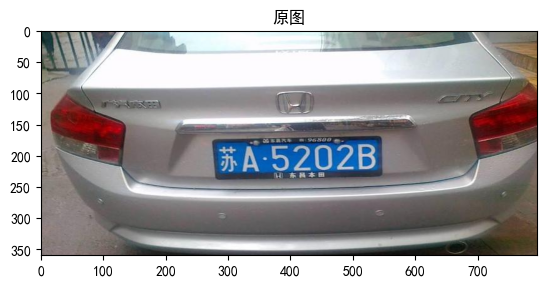

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import cv2
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体为黑体
matplotlib.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
image=cv2.imread("../../images/demo1.png")
rgbimg = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgbimg)
plt.title("原图")
plt.show()

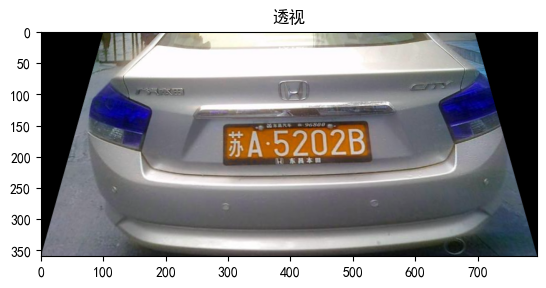

In [14]:
import matplotlib
import matplotlib.pyplot as plt
import cv2
import numpy as np
#仿射是让图像在二维平面中变形，那么透视就是让图像在三维空间中变形
"""
OpenCV中需要通过定位图像的4个点计算透视效果，4个点的位置如图7.16所示。
OpenCV根据这4个点的位置变化来计算其他像素的位置变化。透视效果不能保证图像的“平直性”和“平行性”。
　src：原始图像。
　M：一个3行3列的矩阵，根据此矩阵的值变换原图中的像素位置。
　dsize：输出图像的尺寸大小。
　flags：可选参数，插值方式，建议使用默认值。
　borderMode：可选参数，边界类型，建议使用默认值。
　borderValue：可选参数，边界值，默认为0，建议使用默认值。
返回值说明：

　dst：经过透视变换后输出图像。


warpPerspective()方法也需要通过M矩阵计算透视效果，但得出这个矩阵需要做很复杂的运算，
于是OpenCV提供了getPerspectiveTransform()方法自动计算M矩阵。
getPerspectiveTransform()方法的语法如下：
     M = cv2.getPerspectiveTransform(src, dst,)
参数说明：

　src：原图4个点坐标，格式为4行2列的32位浮点数列表，例如：[[0, 0], [1, 0], [0, 1],[1, 1]]。
　dst：透视图的4个点坐标，格式与src一样。
返回值说明：
　M：getPerspectiveTransform()方法计算出的仿射矩阵。
"""
rows=len(image)
cols=len(image[0])

M=cv2.getPerspectiveTransform(np.array([[0,0],[cols-1,0],[0,rows-1],[cols-1,rows-1]],dtype=np.float32),
                              np.array([[100,0],[cols-1-100,0],[0,rows-1],[cols-1,rows-1]],dtype=np.float32)
                            )
dImag=cv2.warpPerspective(image,M,(cols,rows))
plt.imshow(dImag)
plt.title("透视")
plt.show()